In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
file_name = "portfolio_data.csv"
data = pd.read_csv(file_name)
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
print(f"Data loaded successfully: {file_name}")

Data loaded successfully: portfolio_data.csv


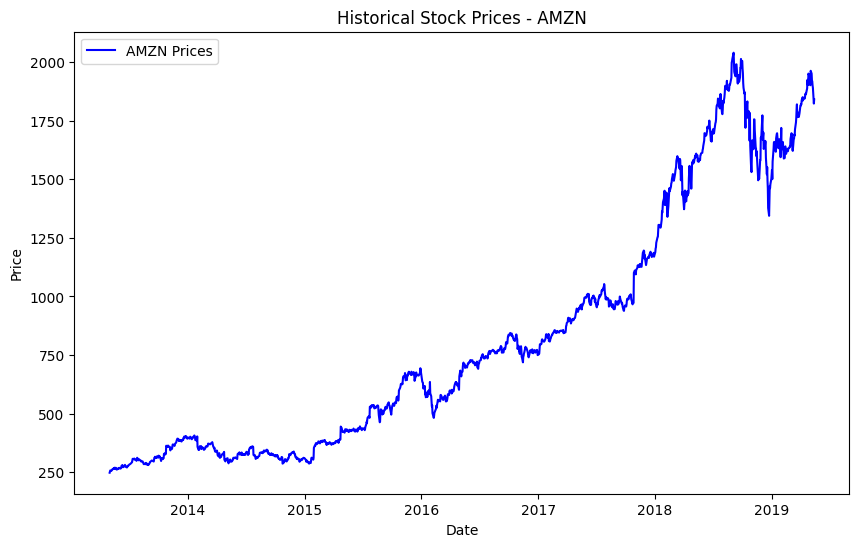

In [ ]:
stock_column = "AMZN"
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data[stock_column], label=f"{stock_column} Prices", color="blue")
plt.title(f"Historical Stock Prices - {stock_column}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
sequence_length = 60
scaler = MinMaxScaler(feature_range=(0, 1))
stock_data = data[['Date', stock_column]].set_index('Date')
normalized_data = scaler.fit_transform(stock_data)

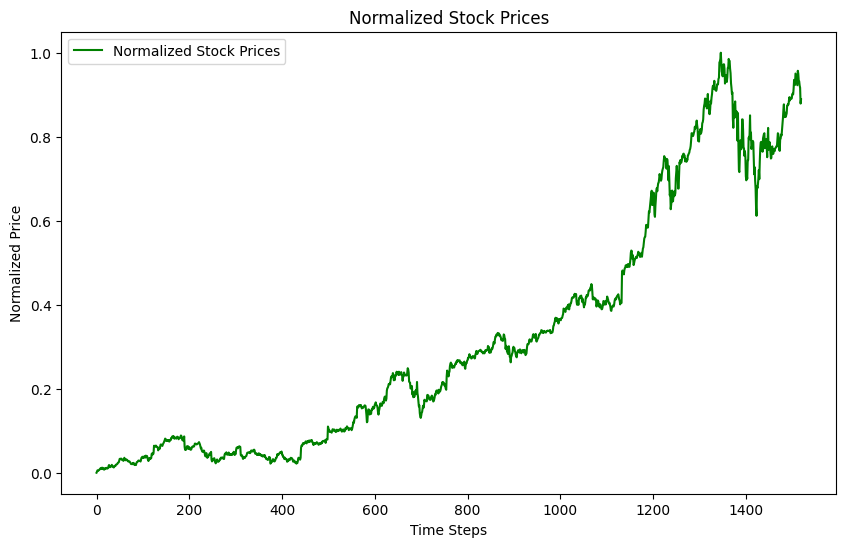

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(normalized_data, label="Normalized Stock Prices", color="green")
plt.title("Normalized Stock Prices")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

In [ ]:
sequences, targets = [], []
for i in range(len(normalized_data) - sequence_length):
    sequences.append(normalized_data[i:i + sequence_length])
    targets.append(normalized_data[i + sequence_length])

X = np.array(sequences)
y = np.array(targets)

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=32, verbose=1)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0206 - val_loss: 0.0039
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 9.5355e-04 - val_loss: 0.0024
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 9.4639e-04 - val_loss: 0.0017
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 9.0381e-04 - val_loss: 0.0051
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 7.1873e-04 - val_loss: 0.0021
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 6.8339e-04 - val_loss: 0.0018
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 6.8941e-04 - val_loss: 0.0027
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 5.8840e-04 - val_loss: 0.0017
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 5.5725e-04 - val_loss: 0.0016
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 6.9562e-04 - val_loss: 0.0026
Epoch 12/20
37/37 ━━━━━━━━━

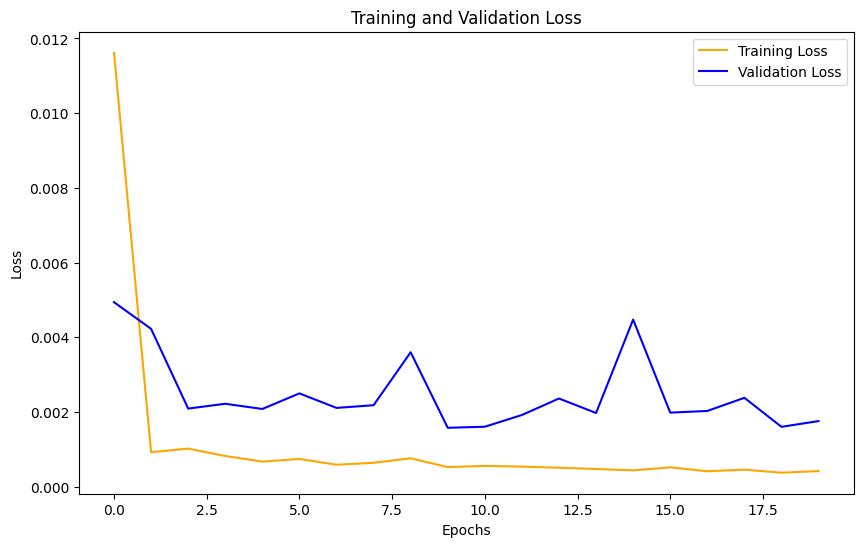

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color="orange")
plt.plot(history.history['val_loss'], label='Validation Loss', color="blue")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()errors = y_test_scaled.flatten() - predictions.flatten()
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color="purple", alpha=0.7)
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


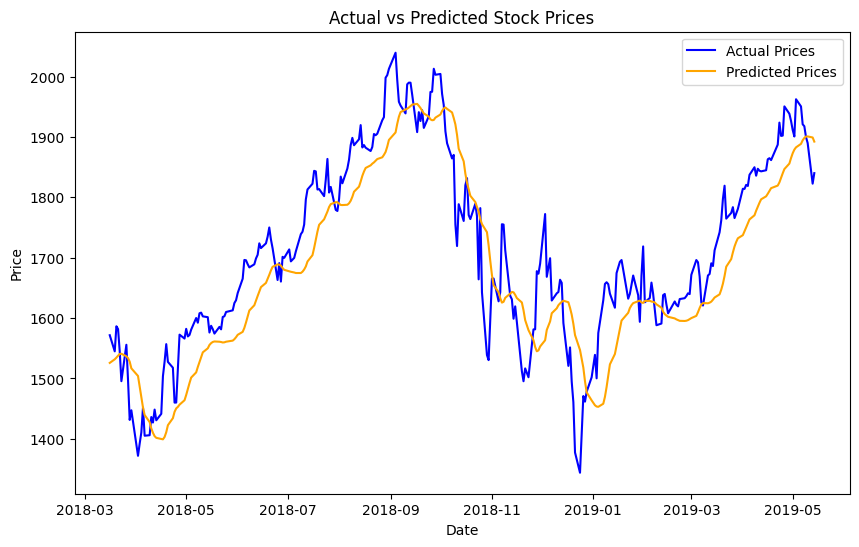

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index[-len(y_test):], y_test_scaled, label="Actual Prices", color="blue")
plt.plot(stock_data.index[-len(y_test):], predictions, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

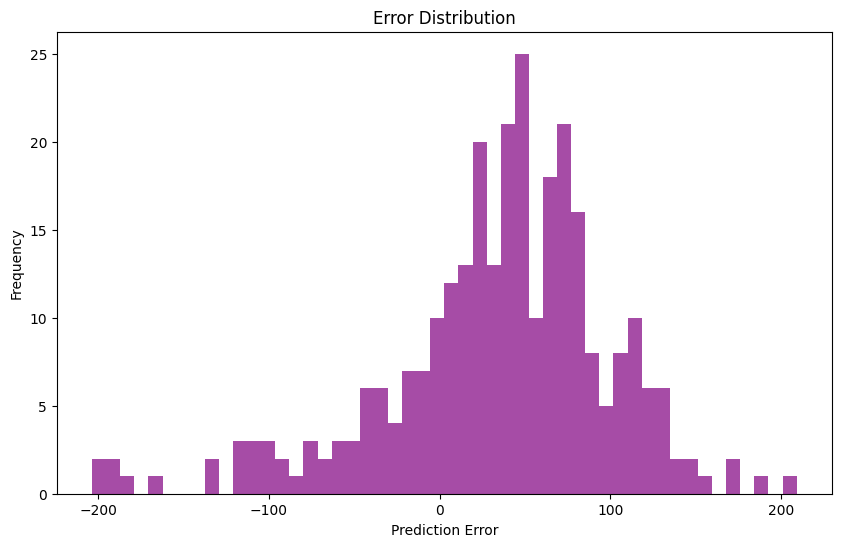

In [ ]:
errors = y_test_scaled.flatten() - predictions.flatten()
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color="purple", alpha=0.7)
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

In [ ]:
model_name = "lstm_stock_model.h5"
model.save(model_name)
print(f"Model saved as {model_name}")

Model saved as lstm_stock_model.h5
